In [34]:
# !pip install pingouin
# !pip install regex
# !pip install altair
import numpy as np
import pandas as pd
# import pingouin as pg
import regex as re
import altair as alt
from altair import *
import requests

In [20]:
# !pip install nba_api
# !pip install sportsreference
from nba_api.stats.static import players
from nba_api.stats.static import teams 
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playerdashptshotdefend
from nba_api.stats.endpoints import draftcombineplayeranthro
from nba_api.stats.library.parameters import *
from nba_api.stats.static import players
import json
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sportsreference.ncaab.boxscore import Boxscore
from sportsreference.ncaab.player import AbstractPlayer
import pprint
from sportsreference.ncaab.teams import Teams
from sportsreference.ncaab.roster import Roster
from sportsreference.ncaab.roster import Player
from sportsreference.nba.teams import Teams as NBA_TEAMS
from sportsreference.nba.roster import Roster as NBA_ROSTER
from sportsreference.nba.roster import Player as NBA_PLAYER
import random

In [10]:
player_dict = players.get_players()

# Use ternary operator or write function 
# Names are case sensitive
bron = [player for player in player_dict if player['full_name'] == 'LeBron James'][0]
bron_id = bron['id']

# find team Ids
teams = teams.get_teams()
GSW = [x for x in teams if x['full_name'] == 'Golden State Warriors'][0]
GSW_id = GSW['id']

In [11]:
#Call the API endpoint passing in lebron's ID & which season 
gamelog_bron = playergamelog.PlayerGameLog(player_id='2544', season = '2018')

#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
df_bron_games_2018 = gamelog_bron.get_data_frames()

gamelog_bron_all = playergamelog.PlayerGameLog(player_id='2544', season = SeasonAll.all)

df_bron_games_all = gamelog_bron_all.get_data_frames()

In [12]:
#this time we convert it to a dataframe in the same line of code
GSW_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=GSW_id).get_data_frames()[0]

In [13]:
wingspan13=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2013')
wingspan13_df = wingspan13.get_data_frames()
wingspan13 = pd.DataFrame(wingspan13_df[0])
wingspan13
wingspan14=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2014')
wingspan14_df = wingspan14.get_data_frames()
wingspan14 = pd.DataFrame(wingspan14_df[0])
wingspan14
wingspan15=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2015')
wingspan15_df = wingspan15.get_data_frames()
wingspan15 = pd.DataFrame(wingspan15_df[0])
wingspan15
wingspan16=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2016')
wingspan16_df = wingspan16.get_data_frames()
wingspan16 = pd.DataFrame(wingspan16_df[0])
wingspan16
wingspan17=draftcombineplayeranthro.DraftCombinePlayerAnthro(league_id='00',season_year='2017')
wingspan17_df = wingspan17.get_data_frames()
wingspan17 = pd.DataFrame(wingspan17_df[0])
#wingspan17

In [17]:
pd.set_option("display.max_columns", 999)
shotchart = shotchartdetail.ShotChartDetail(team_id = '0',player_id='0',date_from_nullable ='01/01/2019', date_to_nullable = '12/31/2019')
leagueshotchart = shotchart.get_data_frames()
leagueshotchartdf = pd.DataFrame(leagueshotchart[0])
leagueshotchartdf

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800549,7,201586,Serge Ibaka,1610612761,Toronto Raptors,1,11,36,Made Shot,Turnaround Hook Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,1,20,1,1,20190101,TOR,UTA
1,Shot Chart Detail,0021800549,8,1628378,Donovan Mitchell,1610612762,Utah Jazz,1,11,23,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,6,2,1,1,20190101,TOR,UTA
2,Shot Chart Detail,0021800549,11,203497,Rudy Gobert,1610612762,Utah Jazz,1,10,50,Made Shot,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,2,1,1,20190101,TOR,UTA
3,Shot Chart Detail,0021800549,13,201980,Danny Green,1610612761,Toronto Raptors,1,10,34,Made Shot,Turnaround Bank Hook Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,12,1,1,1,20190101,TOR,UTA
4,Shot Chart Detail,0021800549,21,1627783,Pascal Siakam,1610612761,Toronto Raptors,1,10,5,Made Shot,Cutting Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,2,3,1,1,20190101,TOR,UTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97106,Shot Chart Detail,0021900503,655,1629029,Luka Doncic,1610612742,Dallas Mavericks,4,2,57,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,27,-10,278,1,1,20191231,OKC,DAL
97107,Shot Chart Detail,0021900503,667,101108,Chris Paul,1610612760,Oklahoma City Thunder,4,1,59,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-235,-3,1,1,20191231,OKC,DAL
97108,Shot Chart Detail,0021900503,682,1629029,Luka Doncic,1610612742,Dallas Mavericks,4,1,22,Made Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,-2,48,1,1,20191231,OKC,DAL
97109,Shot Chart Detail,0021900503,683,101108,Chris Paul,1610612760,Oklahoma City Thunder,4,1,14,Made Shot,Driving Floating Jump Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,10,36,1,1,20191231,OKC,DAL


In [21]:
shotdefense1819 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2018-19')
shotdefenseget1819 = shotdefense1819.get_data_frames()
shotdefense1819df = pd.DataFrame(shotdefenseget1819[0])
shotdefense1819df
shotdefense1718 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2017-18')
shotdefenseget1718 = shotdefense1718.get_data_frames()
shotdefense1718df = pd.DataFrame(shotdefenseget1718[0])
shotdefense1718df
shotdefense1617 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2016-17')
shotdefenseget1617 = shotdefense1617.get_data_frames()
shotdefense1617df = pd.DataFrame(shotdefenseget1617[0])
shotdefense1617df
shotdefense1516 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2015-16')
shotdefenseget1516 = shotdefense1516.get_data_frames()
shotdefense1516df = pd.DataFrame(shotdefenseget1516[0])
shotdefense1516df
shotdefense1415 = playerdashptshotdefend.PlayerDashPtShotDefend(team_id = '0',player_id='0',season='2014-15')
shotdefenseget1415 = shotdefense1415.get_data_frames()
shotdefense1415df = pd.DataFrame(shotdefenseget1415[0])
shotdefense1415df

,CLOSE_DEF_PERSON_ID,GP,G,DEFENSE_CATEGORY,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS
0,708,47,47,Overall,1.000,134.0,285.0,0.470,0.465,0.006
1,977,35,35,Overall,1.000,150.0,311.0,0.482,0.444,0.038
2,1495,77,77,Overall,1.000,450.0,1010.0,0.446,0.471,-0.026
3,1713,63,63,Overall,1.000,133.0,311.0,0.428,0.435,-0.008
4,1717,77,77,Overall,1.000,418.0,867.0,0.482,0.460,0.023
...,...,...,...,...,...,...,...,...,...,...
2935,204033,2,2,Greater Than 15 Ft,0.750,1.0,3.0,0.333,0.328,0.006
2936,200748,1,1,Greater Than 15 Ft,1.000,0.0,2.0,0.000,0.347,-0.347
2937,200769,4,4,Greater Than 15 Ft,0.810,8.0,17.0,0.471,0.382,0.089
2938,101142,1,1,Greater Than 15 Ft,0.167,1.0,1.0,1.000,0.351,0.649


In [22]:
players = players.get_players()
[x for x in players]
players[0]['full_name']
player_name = None
player_list = []
x=0

for player in players:
    player_name = players[x]['full_name']
    player_list.append(player_name)
    x+=1

In [24]:

#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
df_bron_games_2018 = gamelog_bron.get_data_frames()

gamelog_bron_all = playergamelog.PlayerGameLog(player_id='2544', season = SeasonAll.all)

bron_dict = gamelog_bron_all.get_dict() 
df = pd.DataFrame(df_bron_games_2018[0])
df

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,2544,0021801135,"MAR 29, 2019",LAL vs. CHA,W,32,11,19,0.579,4,7,0.571,1,2,0.500,0,3,3,9,0,0,6,1,27,14,1
1,22018,2544,0021801116,"MAR 26, 2019",LAL vs. WAS,W,34,11,20,0.550,1,6,0.167,0,2,0.000,0,7,7,14,1,0,3,1,23,3,1
2,22018,2544,0021801102,"MAR 24, 2019",LAL vs. SAC,W,35,9,22,0.409,3,6,0.500,8,9,0.889,2,9,11,11,2,1,4,1,29,5,1
3,22018,2544,0021801086,"MAR 22, 2019",LAL vs. BKN,L,37,8,25,0.320,1,7,0.143,8,12,0.667,3,6,9,14,1,1,8,3,25,-2,1
4,22018,2544,0021801042,"MAR 17, 2019",LAL @ NYK,L,35,11,26,0.423,0,6,0.000,11,13,0.846,2,4,6,8,0,1,2,2,33,9,2
5,22018,2544,0021801023,"MAR 14, 2019",LAL @ TOR,L,32,12,23,0.522,1,5,0.200,4,7,0.571,0,4,4,6,1,0,4,2,29,0,1
6,22018,2544,0021801009,"MAR 12, 2019",LAL @ CHI,W,33,15,23,0.652,2,4,0.500,4,5,0.800,1,9,10,4,2,0,5,2,36,9,1
7,22018,2544,0021800989,"MAR 09, 2019",LAL vs. BOS,L,28,13,23,0.565,1,5,0.200,3,7,0.429,2,8,10,12,0,0,3,0,30,11,1
8,22018,2544,0021800974,"MAR 06, 2019",LAL vs. DEN,L,31,13,22,0.591,2,7,0.286,3,8,0.375,0,7,7,7,1,1,4,4,31,-8,1
9,22018,2544,0021800958,"MAR 04, 2019",LAL vs. LAC,L,42,9,18,0.500,1,6,0.167,8,12,0.667,0,8,8,6,1,1,2,3,27,-11,1


In [29]:
shotdefense1718df = shotdefense1718df.rename(columns={'CLOSE_DEF_playerId':'CLOSE_DEF_PERSON_ID'})
shotdefense1819df = shotdefense1819df.rename(columns={'CLOSE_DEF_playerId':'CLOSE_DEF_PERSON_ID'})
shotdefense1819df.head()

,CLOSE_DEF_PERSON_ID,GP,G,DEFENSE_CATEGORY,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS
0,1629118,7,7,Overall,1.0,8.0,20.0,0.400,0.467,-0.067
1,1629121,31,31,Overall,1.0,64.0,139.0,0.460,0.444,0.016
2,1629122,2,2,Overall,1.0,4.0,8.0,0.500,0.484,0.016
3,1629123,11,11,Overall,1.0,10.0,38.0,0.263,0.425,-0.162
4,1629126,21,21,Overall,1.0,36.0,92.0,0.391,0.448,-0.056


In [30]:
draftclass13 = pd.merge(left=shotdefense1415df,right=wingspan13,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass13 = draftclass13.dropna(subset=['PLAYER_NAME'])
draftclass14 = pd.merge(left=shotdefense1516df,right=wingspan14,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass14 = draftclass14.dropna(subset=['PLAYER_NAME'])
draftclass15 = pd.merge(left=shotdefense1617df,right=wingspan15,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass15 = draftclass15.dropna(subset=['PLAYER_NAME'])
draftclass16 = pd.merge(left=shotdefense1718df,right=wingspan16,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass16 = draftclass16.dropna(subset=['PLAYER_NAME'])
draftclass17 = pd.merge(left=shotdefense1819df,right=wingspan17,how='left',left_on='CLOSE_DEF_PERSON_ID',right_on='PLAYER_ID')
draftclass17 = draftclass17.dropna(subset=['PLAYER_NAME'])
allclasses = pd.concat([draftclass13,draftclass14,draftclass15,draftclass16,draftclass17])
allclasses.head()

,CLOSE_DEF_PERSON_ID,GP,G,DEFENSE_CATEGORY,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
382,203501,68,68,Overall,1.0,261.0,539.0,0.484,0.436,0.048,None,203501.0,Tim,Hardaway Jr.,Tim Hardaway Jr.,SG,76.50,6' 4.5'',78.25,6' 6.25'',199.4,79.00,6' 7'',101.0,8' 5'',6.05,8.00,9.25
383,203503,66,66,Overall,1.0,183.0,449.0,0.408,0.435,-0.027,None,203503.0,Tony,Snell,Tony Snell,SF-SG,78.00,6' 6'',79.25,6' 7.25'',198.2,83.50,6' 11.5'',105.5,8' 9.5'',4.85,9.00,9.50
384,203504,76,76,Overall,1.0,313.0,692.0,0.452,0.435,0.017,None,203504.0,Trey,Burke,Trey Burke,PG,71.75,5' 11.75'',73.25,6' 1.25'',187,77.50,6' 5.5'',97.5,8' 1.5'',6.90,8.25,8.75
385,203505,2,2,Overall,1.0,4.0,13.0,0.308,0.405,-0.097,None,203505.0,Vander,Blue,Vander Blue,SG,75.50,6' 3.5'',77.25,6' 5.25'',197.4,78.00,6' 6'',100.5,8' 4.5'',4.60,8.50,9.50
386,203506,72,72,Overall,1.0,386.0,811.0,0.476,0.437,0.039,None,203506.0,Victor,Oladipo,Victor Oladipo,SG,75.25,6' 3.25'',76.25,6' 4.25'',213.2,81.25,6' 9.25'',100.5,8' 4.5'',6.55,8.75,9.25


(-0.7889999999999999, 0.8460000000000001)

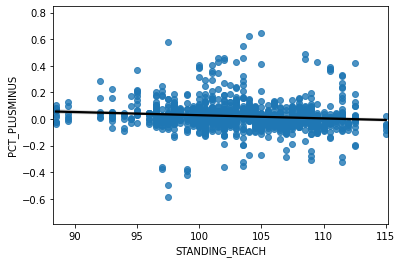

In [32]:
##Let's create a scatter plot to assuage the relationship between PCT_PLUSMINUS and STANDING_REACH
#We will also fit a regression line to the data, to aid our understanding visually
ax = sns.regplot(data=allclasses,x='STANDING_REACH',y='PCT_PLUSMINUS', line_kws={'color':'black'})
ax.set_xlim(allclasses['STANDING_REACH'].min() - 0.2, allclasses['STANDING_REACH'].max() + 0.2)
ax.set_ylim(allclasses['PCT_PLUSMINUS'].min() - 0.2, allclasses['PCT_PLUSMINUS'].max() + 0.2)

In [35]:
Base = alt.Chart(allclasses).mark_circle(size=30).encode(
x=alt.X(
  'STANDING_REACH',
  axis=alt.Axis(),
  scale=Scale(domain=[85, 120]),
  title=None
  ),
  y=alt.Y(
  'PCT_PLUSMINUS',
  axis=alt.Axis(),
  scale=Scale(domain=[-0.7, 0.7]),
  title='Standing Reach X Effect on FG Percentage'
  ),
  color = alt.Color('POSITION',scale = alt.Scale(scheme='bluegreen'))
 )

Base + Base.transform_regression('STANDING_REACH','PCT_PLUSMINUS').mark_line(color='black')

alt.LayerChart(...)

In [18]:
#As expected, the relationship between both variables is negative(lower plus minus==better defense), though it appears to be weaker than we anticipated. Let's calculate the pearson correlation coefficient and R2 to validate.
#Note: filter out excess noise from visualization to clean up visualization
pg.corr(x=allclasses['STANDING_REACH'], y=allclasses['PCT_PLUSMINUS'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1253,-0.13577,"[-0.19, -0.08]",0.018433,0.016863,0.000001,3936.842,0.99796


In [36]:
#Now lets reformat the PLAYER_NAME column in the ncaa dataframe to match the player_id column in the nba dataframe
def reformat_PLAYERNAME_ncaa(player_lst):
    new_list = []
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTHREE = re.compile(r"([a-z]{0,3})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))>=5:
            player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==4:
            player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==3:
            player = re.search(FIRSTTHREE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            new_list.append(player)
        else:
             player = re.search(FIRSTTWO,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
             new_list.append(player)
    return new_list
    

In [37]:
#adding a player id column for all classes so we can compare standing reach and blocks/steals
reformat_PLAYERNAME_ncaa(allclasses['PLAYER_NAME'])

allclasses['PLAYER_ID'] = reformat_PLAYERNAME_ncaa(allclasses['PLAYER_NAME'])
allclasses

,CLOSE_DEF_PERSON_ID,GP,G,DEFENSE_CATEGORY,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
382,203501,68,68,Overall,1.000,261.0,539.0,0.484,0.436,0.048,None,hardati01,Tim,Hardaway Jr.,Tim Hardaway Jr.,SG,76.50,6' 4.5'',78.25,6' 6.25'',199.4,79.00,6' 7'',101.0,8' 5'',6.05,8.00,9.25
383,203503,66,66,Overall,1.000,183.0,449.0,0.408,0.435,-0.027,None,snellto01,Tony,Snell,Tony Snell,SF-SG,78.00,6' 6'',79.25,6' 7.25'',198.2,83.50,6' 11.5'',105.5,8' 9.5'',4.85,9.00,9.50
384,203504,76,76,Overall,1.000,313.0,692.0,0.452,0.435,0.017,None,burketr01,Trey,Burke,Trey Burke,PG,71.75,5' 11.75'',73.25,6' 1.25'',187,77.50,6' 5.5'',97.5,8' 1.5'',6.90,8.25,8.75
385,203505,2,2,Overall,1.000,4.0,13.0,0.308,0.405,-0.097,None,blueva01,Vander,Blue,Vander Blue,SG,75.50,6' 3.5'',77.25,6' 5.25'',197.4,78.00,6' 6'',100.5,8' 4.5'',4.60,8.50,9.50
386,203506,72,72,Overall,1.000,386.0,811.0,0.476,0.437,0.039,None,oladivi01,Victor,Oladipo,Victor Oladipo,SG,75.25,6' 3.25'',76.25,6' 4.25'',213.2,81.25,6' 9.25'',100.5,8' 4.5'',6.55,8.75,9.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,1628408,3,2,Greater Than 15 Ft,0.357,2.0,5.0,0.400,0.339,0.061,17021.0,doziepj01,PJ,Dozier,PJ Dozier,SG,77.25,6' 5.25'',78.75,6' 6.75'',200.6,83.00,6' 11'',101.0,8' 5'',6.10,8.50,9.50
3106,1628396,2,2,Greater Than 15 Ft,0.450,5.0,9.0,0.556,0.367,0.188,17012.0,bradlto01,Tony,Bradley,Tony Bradley,C,81.25,6' 9.25'',82.75,6' 10.75'',248.8,89.00,7' 5'',112.5,9' 4.5'',12.00,9.50,9.50
3108,1628365,17,17,Greater Than 15 Ft,0.476,21.0,59.0,0.356,0.367,-0.011,17025.0,fultzma01,Markelle,Fultz,Markelle Fultz,PG,NaN,None,NaN,None,None,NaN,None,NaN,None,NaN,NaN,NaN
3112,1628415,18,18,Greater Than 15 Ft,0.568,18.0,63.0,0.286,0.369,-0.083,17014.0,brookdi01,Dillon,Brooks,Dillon Brooks,SG-SF,77.00,6' 5'',78.00,6' 6'',220.2,78.00,6' 6'',100.5,8' 4.5'',7.50,8.25,9.25


In [39]:
carsenedwards = AbstractPlayer(player_id = 'carsen-edwards-1', player_name='carsen-edwards-1',player_data='all_players_per_game')
carsenedwards

In [41]:
#Let's get the names of all of the nba players
allplayersnba = pd.read_csv('All_NBA_Players.csv')
allplayersnba['NAME'] = allplayersnba['NAME'].str.replace(',', '')
allplayersnba = allplayersnba.dropna(subset=['COLLEGE'])
nba_ncaaplayers = allplayersnba['NAME'].to_list()

In [42]:
ncaa_columns = ['assist_percentage', 'assists', 'block_percentage', 'blocks',
       'box_plus_minus', 'conference', 'defensive_box_plus_minus',
       'defensive_rebound_percentage', 'defensive_rebounds',
       'defensive_win_shares', 'effective_field_goal_percentage',
       'field_goal_attempts', 'field_goal_percentage', 'field_goals',
       'free_throw_attempt_rate', 'free_throw_attempts',
       'free_throw_percentage', 'free_throws', 'games_played', 'games_started',
       'height', 'minutes_played', 'offensive_box_plus_minus',
       'offensive_rebound_percentage', 'offensive_rebounds',
       'offensive_win_shares', 'personal_fouls', 'player_efficiency_rating',
       'player_id', 'points', 'points_produced', 'position',
       'steal_percentage', 'steals', 'team_abbreviation',
       'three_point_attempt_rate', 'three_point_attempts',
       'three_point_percentage', 'three_pointers', 'total_rebound_percentage',
       'total_rebounds', 'true_shooting_percentage', 'turnover_percentage',
       'turnovers', 'two_point_attempts', 'two_point_percentage',
       'two_pointers', 'usage_percentage', 'weight', 'win_shares',
       'win_shares_per_40_minutes']

nba_columns = ['and_ones', 'assist_percentage', 'assists', 'block_percentage', 'blocking_fouls', 'blocks', 'box_plus_minus', 'center_percentage', 'defensive_box_plus_minus', 'defensive_rebound_percentage', 'defensive_rebounds', 'defensive_win_shares', 'dunks', 'effective_field_goal_percentage', 'field_goal_attempts', 'field_goal_perc_sixteen_foot_plus_two_pointers', 'field_goal_perc_ten_to_sixteen_feet', 'field_goal_perc_three_to_ten_feet', 'field_goal_perc_zero_to_three_feet', 'field_goal_percentage', 'field_goals', 'free_throw_attempt_rate', 'free_throw_attempts', 'free_throw_percentage', 'free_throws', 'games_played', 'games_started', 'half_court_heaves', 'half_court_heaves_made', 'height', 'lost_ball_turnovers', 'minutes_played', 'nationality', 'net_plus_minus', 'offensive_box_plus_minus', 'offensive_fouls', 'offensive_rebound_percentage', 'offensive_rebounds', 'offensive_win_shares', 'on_court_plus_minus', 'other_turnovers', 'passing_turnovers', 'percentage_field_goals_as_dunks', 'percentage_of_three_pointers_from_corner', 'percentage_shots_three_pointers', 'percentage_shots_two_pointers', 'percentage_sixteen_foot_plus_two_pointers', 'percentage_ten_to_sixteen_footers', 'percentage_three_to_ten_footers', 'percentage_zero_to_three_footers', 'personal_fouls', 'player_efficiency_rating', 'player_id', 'point_guard_percentage', 'points', 'points_generated_by_assists', 'position', 'power_forward_percentage', 'salary', 'shooting_distance', 'shooting_fouls', 'shooting_fouls_drawn', 'shooting_guard_percentage', 'shots_blocked', 'small_forward_percentage', 'steal_percentage', 'steals', 'take_fouls', 'team_abbreviation', 'three_point_attempt_rate', 'three_point_attempts', 'three_point_percentage', 'three_point_shot_percentage_from_corner', 'three_pointers', 'three_pointers_assisted_percentage', 'total_rebound_percentage', 'total_rebounds', 'true_shooting_percentage', 'turnover_percentage', 'turnovers', 'two_point_attempts', 'two_point_percentage', 'two_pointers', 'two_pointers_assisted_percentage', 'usage_percentage', 'value_over_replacement_player', 'weight', 'win_shares', 'win_shares_per_48_minutes']



team_name = "DUKE"

my_string = '-1'

player_list = []

roster = Roster(team_name)
for player in roster.players:
    player_list.append(player.name)
    
player_list = [each_string.lower() for each_string in player_list]

player_list_hyphens = [p.strip().replace(" ", "-") for p in player_list]

player_list_complete = [s + my_string for s in player_list_hyphens]

In [43]:
def playerformat_ncaa(player_lst):
    my_string = '-1'
    player_list = [each_string.lower() for each_string in player_lst]
    player_list_hyphens = [p.strip().replace(" ", "-") for p in player_list]
    player_list_complete = [s + my_string for s in player_list_hyphens]
    return player_list_complete

In [44]:
def ncaa_playerdf(player_lst):
    player_df = pd.DataFrame(columns=ncaa_columns)
    for player in player_lst:
        try:
            x = Player(player)
            y = x.dataframe
            player_df = player_df.append(y)
        except:
            next
    return player_df



In [47]:
ncaa_dataframe_final = ncaa_playerdf(playerformat_ncaa(nba_ncaaplayers))
ncaa_dataframe_final

,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
"(2012-13,)",5.4,20,11.2,65,8.1,big-east,4.2,21.0,113,1.9,0.571,175,0.571,100,0.400,70,0.443,31,32,32,7-0,749,4.0,15.3,90,1.6,52,23.2,steven-adams-1,231,228,Center,1.9,21,pittsburgh,0.000,0,NaN,0,18.0,203,0.555,14.4,35,175,0.571,100,17.7,250,3.5,0.185
"(Career,)",5.4,20,11.2,65,8.1,,4.2,21.0,113,1.9,0.571,175,0.571,100,0.400,70,0.443,31,32,32,7-0,749,4.0,15.3,90,1.6,52,23.2,steven-adams-1,231,228,Center,1.9,21,pittsburgh,0.000,0,NaN,0,18.0,203,0.555,14.4,35,175,0.571,100,17.7,250,3.5,0.185
"(2016-17,)",5.7,27,5.0,51,5.2,big-12,2.6,18.9,178,1.7,0.566,316,0.566,179,0.472,149,0.564,84,33,33,6-11,1061,2.6,10.9,100,1.5,68,20.3,jarrett-allen-1,442,428,Forward,1.0,19,texas,0.022,7,0.0,0,14.9,278,0.571,17.8,84,309,0.579,179,22.6,235,3.3,0.124
"(Career,)",5.7,27,5.0,51,5.2,,2.6,18.9,178,1.7,0.566,316,0.566,179,0.472,149,0.564,84,33,33,6-11,1061,2.6,10.9,100,1.5,68,20.3,jarrett-allen-1,442,428,Forward,1.0,19,texas,0.022,7,0.0,0,14.9,278,0.571,17.8,84,309,0.579,179,22.6,235,3.3,0.124
"(2017-18,)",10.2,57,6.1,66,11.0,pac-12,2.4,28.2,287,2.1,0.625,451,0.612,276,0.424,191,0.733,140,35,35,7-1,1172,8.6,13.5,118,5.5,81,32.6,deandre-ayton-1,704,666,Forward,1.0,20,arizona,0.078,35,0.343,12,21.4,405,0.650,11.3,69,416,0.635,264,26.6,250,7.6,0.259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(2017-18,)",18.1,100,0.6,7,3.9,colonial,-1.5,9.5,93,0.5,0.531,588,0.449,264,0.279,164,0.799,131,31,30,6-2,1171,5.5,1.0,10,4.0,62,22.8,justin-wright-foreman-1,755,687,Guard,1.2,25,hofstra,0.446,262,0.366,96,5.1,103,0.567,9.4,69,326,0.515,168,30.9,190,4.5,0.153
"(2018-19,)",17.4,102,0.6,7,6.0,colonial,-1.9,11.5,129,1.0,0.596,646,0.511,330,0.319,206,0.864,178,35,35,6-2,1321,7.9,1.2,12,6.3,67,28.9,justin-wright-foreman-1,948,844,Guard,1.3,30,hofstra,0.401,259,0.425,110,6.6,141,0.637,10.9,91,387,0.568,220,33.0,190,7.4,0.223
"(Career,)",16.3,258,0.6,19,4.9,,-1.5,10.8,323,2.0,0.565,1694,0.483,819,0.300,508,0.811,412,125,82,6-2,3507,6.4,1.4,44,13.8,201,25.4,justin-wright-foreman-1,2327,2068,Guard,1.4,83,hofstra,0.424,718,0.386,277,6.1,367,0.601,9.9,212,976,0.555,542,30.9,190,15.8,0.181
"(2017-18,)",48.6,279,0.7,8,11.1,big-12,1.3,10.0,111,1.1,0.518,618,0.422,261,0.443,274,0.861,236,32,32,6-2,1133,9.7,1.3,14,4.6,57,28.3,trae-young-1,876,935,Guard,2.5,54,oklahoma,0.531,328,0.36,118,5.8,125,0.585,18.2,167,290,0.493,143,37.1,180,5.7,0.201


In [48]:
def reformatname_year_ncaa(sampledf):
    sampledf['PLAYER_NAME'] = sampledf.player_id.str.replace("-"," ")
    sampledf['PLAYER_NAME'] = sampledf['PLAYER_NAME'].apply(lambda x: x.title()).str.replace(" 1","")
    sampledf = sampledf.reset_index().rename(columns={'index':'Year'})
    sampledf['Year'] = sampledf['Year'].astype(str)
    sampledf['Year'] = sampledf['Year'].str.replace('(', '')
    sampledf['Year'] = sampledf['Year'].str.replace(')', '')
    sampledf['Year'] = sampledf['Year'].str.replace("'", "")
    sampledf['Year'] = sampledf['Year'].str.replace(',', '')
    career = sampledf['Year']!='Career'
    sampledf = sampledf[career]
    

    return sampledf
ncaa_dataframe_final = reformatname_year_ncaa(ncaa_dataframe_final)
ncaa_dataframe_final

C:\ProgramData\Anaconda3\envs\NICK\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
C:\ProgramData\Anaconda3\envs\NICK\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,Year,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,PLAYER_NAME
0,2012-13,5.4,20,11.2,65,8.1,big-east,4.2,21.0,113,1.9,0.571,175,0.571,100,0.400,70,0.443,31,32,32,7-0,749,4.0,15.3,90,1.6,52,23.2,steven-adams-1,231,228,Center,1.9,21,pittsburgh,0.000,0,NaN,0,18.0,203,0.555,14.4,35,175,0.571,100,17.7,250,3.5,0.185,Steven Adams
2,2016-17,5.7,27,5.0,51,5.2,big-12,2.6,18.9,178,1.7,0.566,316,0.566,179,0.472,149,0.564,84,33,33,6-11,1061,2.6,10.9,100,1.5,68,20.3,jarrett-allen-1,442,428,Forward,1.0,19,texas,0.022,7,0.0,0,14.9,278,0.571,17.8,84,309,0.579,179,22.6,235,3.3,0.124,Jarrett Allen
4,2017-18,10.2,57,6.1,66,11.0,pac-12,2.4,28.2,287,2.1,0.625,451,0.612,276,0.424,191,0.733,140,35,35,7-1,1172,8.6,13.5,118,5.5,81,32.6,deandre-ayton-1,704,666,Forward,1.0,20,arizona,0.078,35,0.343,12,21.4,405,0.650,11.3,69,416,0.635,264,26.6,250,7.6,0.259,Deandre Ayton
6,2005-06,1.6,3,2.2,13,None,pac-10,None,None,74,0.9,0.429,140,0.429,60,0.279,39,0.641,25,28,12,6-10,462,None,None,42,-0.1,54,None,aron-baynes-1,145,None,Center,None,5,washington-state,0.007,1,0.0,0,15.6,116,0.457,16.8,32,139,0.432,60,23.2,250,0.8,0.072,Aron Baynes
7,2006-07,NaN,3,NaN,11,None,pac-10,None,None,47,0.8,0.495,93,0.495,46,0.699,65,0.646,42,26,7,6-10,426,None,None,33,0.5,62,None,aron-baynes-1,134,None,Center,None,4,washington-state,0.000,0,NaN,0,NaN,80,0.541,9.5,13,93,0.495,46,NaN,250,1.4,0.128,Aron Baynes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,2015-16,7.2,4,2.6,3,-4.4,colonial,-0.4,7.7,8,0.1,0.500,38,0.447,17,0.289,11,0.545,6,27,0,6-2,110,-4.0,1.0,1,0.0,13,11.6,justin-wright-foreman-1,44,37,Guard,2.1,4,hofstra,0.447,17,0.235,4,4.4,9,0.509,13.9,7,21,0.619,13,22.3,190,0.2,0.06,Justin Wright Foreman
1362,2016-17,13.5,52,0.2,2,5.7,colonial,-1.1,11.8,93,0.4,0.572,422,0.493,208,0.301,127,0.764,97,32,17,6-2,905,6.8,2.5,21,3.4,59,25.3,justin-wright-foreman-1,580,500,Guard,1.5,24,hofstra,0.427,180,0.372,67,7.0,114,0.601,8.5,45,242,0.583,141,29.0,190,3.8,0.17,Justin Wright Foreman
1363,2017-18,18.1,100,0.6,7,3.9,colonial,-1.5,9.5,93,0.5,0.531,588,0.449,264,0.279,164,0.799,131,31,30,6-2,1171,5.5,1.0,10,4.0,62,22.8,justin-wright-foreman-1,755,687,Guard,1.2,25,hofstra,0.446,262,0.366,96,5.1,103,0.567,9.4,69,326,0.515,168,30.9,190,4.5,0.153,Justin Wright Foreman
1364,2018-19,17.4,102,0.6,7,6.0,colonial,-1.9,11.5,129,1.0,0.596,646,0.511,330,0.319,206,0.864,178,35,35,6-2,1321,7.9,1.2,12,6.3,67,28.9,justin-wright-foreman-1,948,844,Guard,1.3,30,hofstra,0.401,259,0.425,110,6.6,141,0.637,10.9,91,387,0.568,220,33.0,190,7.4,0.223,Justin Wright Foreman


In [49]:
def reformatname_year_nba(sampledf):
    sampledf = sampledf.reset_index().rename(columns={'index':'Year'})
    sampledf['Year'] = sampledf['Year'].astype(str)
    sampledf['Year'] = sampledf['Year'].str.replace('(', '')
    sampledf['Year'] = sampledf['Year'].str.replace(')', '')
    sampledf['Year'] = sampledf['Year'].str.replace("'", "")
    sampledf['Year'] = sampledf['Year'].str.replace(',', '')
    career = sampledf['Year']!='Career'
    sampledf = sampledf[career]
    

    return sampledf

In [53]:
problem_names2 = ['Jaxson Hayes',  'Anthony Davis', 'Jeff Green', 'Alize Johnson', 'Taurean Prince', 'Marvin Williams', 'Harrison Barnes', 'Tobias Harris',  'Louis King', 'Caleb Martin',  'JaKarr Sampson',  'Jaylen Brown', 'Sterling Brown', 'Terence Davis', 'Danny Green', 'Wesley Matthews', 'Josh Reaves',  'Jeremiah Martin', 'Kemba Walker', 'Justin Wright-Foreman']
problem_names3 = ['Damion Lee', 'Brandon Knight', 'Kelan Martin', 'Damian Jones', 'Andre Roberson']
problem_names4 = ['Kenrich Williams', 'Keldon Johnson', 'Stanley Johnson']

In [54]:
def nba_playerdf(player_lst):
    player_df = pd.DataFrame(columns=nba_columns)
    for player in player_lst:
            try:
                x = NBA_PLAYER(player)
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                pass
    return player_df



In [55]:
def nbaplayerdf_test5(player_lst):
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTHREE = re.compile(r"([a-z]{0,3})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    player_df = pd.DataFrame(columns=nba_columns)
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))>=5 and player in problem_names4:
            player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '04'
        elif len(re.search(LASTNAME,player.lower()).group(0))>=5 and player in problem_names3:
            player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '03'
        elif len(re.search(LASTNAME,player.lower()).group(0))>=5 and player in problem_names2:
            player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '02'
        else:
            player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            try:
                x = NBA_PLAYER(player)
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                next
    return player_df

In [56]:
almost_final_nba4 = nbaplayerdf_test5(nba_ncaaplayers)

In [57]:
def nbaplayerdf_test4(player_lst):
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTHREE = re.compile(r"([a-z]{0,3})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    player_df = pd.DataFrame(columns=nba_columns)
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))==4 and player in problem_names4:
            player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '04'
        elif len(re.search(LASTNAME,player.lower()).group(0))==4 and player in problem_names3:
            player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '03'
        elif len(re.search(LASTNAME,player.lower()).group(0))==4 and player in problem_names2:
            player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '02'
        else:
            player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            try:
                x = NBA_PLAYER(player)
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                next
    return player_df

In [58]:
almost_final_nba3 = nbaplayerdf_test4(nba_ncaaplayers)

In [59]:
def nbaplayerdf_test3(player_lst):
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTHREE = re.compile(r"([a-z]{0,3})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    player_df = pd.DataFrame(columns=nba_columns)
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))==3 and player in problem_names4:
            player = re.search(FIRSTTHREE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '04'
        elif len(re.search(LASTNAME,player.lower()).group(0))==3 and player in problem_names3:
            player = re.search(FIRSTTHREE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '03'
        elif len(re.search(LASTNAME,player.lower()).group(0))==3 and player in problem_names2:
            player = re.search(FIRSTTHREE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '02'
        else:
            player = re.search(FIRSTTHREE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            try:
                x = NBA_PLAYER(player)
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                next
    return player_df

In [60]:
almost_final_nba2 = nbaplayerdf_test3(nba_ncaaplayers)

In [61]:
def nbaplayerdf_test2(player_lst):
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTHREE = re.compile(r"([a-z]{0,3})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    player_df = pd.DataFrame(columns=nba_columns)
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))==2 and player in problem_names4:
            player = re.search(FIRSTTWO,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '04'
        elif len(re.search(LASTNAME,player.lower()).group(0))==2 and player in problem_names3:
            player = re.search(FIRSTTWO,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '03'
        elif len(re.search(LASTNAME,player.lower()).group(0))==2 and player in problem_names2:
            player = re.search(FIRSTTWO,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '02'
        else:
            player = re.search(FIRSTTWO,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            try:
                x = NBA_PLAYER(player)
                y = x.dataframe
                player_df = player_df.append(y)
            except:
                next
    return player_df

In [62]:
almost_final_nba1 = nbaplayerdf_test2(nba_ncaaplayers)

In [63]:
nba_dataframe_final = pd.concat([almost_final_nba4,almost_final_nba3,almost_final_nba2, almost_final_nba1])
nba_dataframe_final = reformatname_year_nba(nba_dataframe_final)
nba_dataframe_final

C:\ProgramData\Anaconda3\envs\NICK\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\NICK\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,Year,and_ones,assist_percentage,assists,block_percentage,blocking_fouls,blocks,box_plus_minus,center_percentage,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,dunks,effective_field_goal_percentage,field_goal_attempts,field_goal_perc_sixteen_foot_plus_two_pointers,field_goal_perc_ten_to_sixteen_feet,field_goal_perc_three_to_ten_feet,field_goal_perc_zero_to_three_feet,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,half_court_heaves,half_court_heaves_made,height,lost_ball_turnovers,minutes_played,nationality,net_plus_minus,offensive_box_plus_minus,offensive_fouls,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,on_court_plus_minus,other_turnovers,passing_turnovers,percentage_field_goals_as_dunks,percentage_of_three_pointers_from_corner,percentage_shots_three_pointers,percentage_shots_two_pointers,percentage_sixteen_foot_plus_two_pointers,percentage_ten_to_sixteen_footers,percentage_three_to_ten_footers,percentage_zero_to_three_footers,personal_fouls,player_efficiency_rating,player_id,point_guard_percentage,points,points_generated_by_assists,position,power_forward_percentage,salary,shooting_distance,shooting_fouls,shooting_fouls_drawn,shooting_guard_percentage,shots_blocked,small_forward_percentage,steal_percentage,steals,take_fouls,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_point_shot_percentage_from_corner,three_pointers,three_pointers_assisted_percentage,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,two_pointers_assisted_percentage,usage_percentage,value_over_replacement_player,weight,win_shares,win_shares_per_48_minutes
0,2013-14,None,4.9,43,3.9,None,57,-2.2,0,0.9,17.1,190,1.9,None,0.503,185,0.0,0.25,0.296,0.615,0.503,93,0.735,136,0.581,79,81,20,0,0,6-11,None,1197,New Zealand,None,-3.1,None,14.1,142,0.9,None,None,None,None,None,None,None,0.005,0.043,0.292,0.659,203,11.2,adamsst01,0,265,None,C,0,2090880.0,3.2,None,None,0,None,0,1.7,40,None,OKC,0.0,0,NaN,None,0,None,15.6,332,0.541,22.5,71,185,0.503,93,None,11.7,-0.1,265,2.9,0.114
1,2014-15,None,5.5,66,3.8,None,86,-1.3,0,0.2,19.3,324,2.2,None,0.544,399,0.0,0.333,0.407,0.643,0.544,217,0.514,205,0.502,103,70,67,1,0,6-11,None,1771,New Zealand,None,-1.5,None,12.2,199,1.9,None,None,None,None,None,None,None,0.003,0.038,0.351,0.604,222,14.1,adamsst01,0,537,None,C,0,2184960.0,2.9,None,None,0,None,0,1.1,38,None,OKC,0.005,2,0.0,None,0,None,15.8,523,0.549,16.8,99,397,0.547,217,None,14.3,0.3,265,4.1,0.111
2,2015-16,None,4.3,62,3.3,None,89,0.2,0,0.2,16.1,314,2.3,None,0.613,426,0.5,0.571,0.5,0.655,0.613,261,0.46,196,0.582,114,80,80,0,0,6-11,None,2014,New Zealand,None,0.0,None,12.5,219,4.2,None,None,None,None,None,None,None,0.005,0.016,0.258,0.721,223,15.5,adamsst01,0,636,None,C,0,2279040.0,2.2,None,None,0,None,0,1.0,42,None,OKC,0.0,0,NaN,None,0,None,14.4,533,0.621,14.1,84,426,0.613,261,None,12.6,1.1,265,6.5,0.155
3,2016-17,None,5.4,86,2.6,None,78,-0.2,0,0.0,15.4,332,3.1,None,0.571,655,0.0,0.367,0.488,0.655,0.571,374,0.392,257,0.611,157,80,80,1,0,6-11,None,2389,New Zealand,None,-0.2,None,13.0,281,3.3,None,None,None,None,None,None,None,0.005,0.046,0.388,0.557,195,16.5,adamsst01,0,905,None,C,0,3140517.0,3.7,None,None,0,None,0,1.8,89,None,OKC,0.002,1,0.0,None,0,None,14.2,613,0.589,16.0,146,654,0.572,374,None,16.2,1.1,265,6.5,0.13
4,2017-18,None,5.5,88,2.8,None,78,1.1,0,-0.6,13.9,301,3.0,None,0.629,712,0.0,0.514,0.494,0.688,0.629,448,0.402,286,0.559,160,76,76,2,0,6-11,None,2487,New Zealand,None,1.7,None,16.6,384,6.7,None,None,None,None,None,None,None,0.004,0.052,0.233,0.708,215,20.6,adamsst01,0,1056,None,C,0,22471910.0,2.6,None,None,0,None,0,1.8,92,None,OKC,0.003,2,0.0,None,0,None,15.3,685,0.63,13.3,128,710,0.631,448,None,16.7,2.0,265,9.7,0.187
...,...,...,...,...,...,...,...,...,...,...,...,

In [64]:
ncaa_dataframe_final

,Year,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,PLAYER_NAME
0,2012-13,5.4,20,11.2,65,8.1,big-east,4.2,21.0,113,1.9,0.571,175,0.571,100,0.400,70,0.443,31,32,32,7-0,749,4.0,15.3,90,1.6,52,23.2,steven-adams-1,231,228,Center,1.9,21,pittsburgh,0.000,0,NaN,0,18.0,203,0.555,14.4,35,175,0.571,100,17.7,250,3.5,0.185,Steven Adams
2,2016-17,5.7,27,5.0,51,5.2,big-12,2.6,18.9,178,1.7,0.566,316,0.566,179,0.472,149,0.564,84,33,33,6-11,1061,2.6,10.9,100,1.5,68,20.3,jarrett-allen-1,442,428,Forward,1.0,19,texas,0.022,7,0.0,0,14.9,278,0.571,17.8,84,309,0.579,179,22.6,235,3.3,0.124,Jarrett Allen
4,2017-18,10.2,57,6.1,66,11.0,pac-12,2.4,28.2,287,2.1,0.625,451,0.612,276,0.424,191,0.733,140,35,35,7-1,1172,8.6,13.5,118,5.5,81,32.6,deandre-ayton-1,704,666,Forward,1.0,20,arizona,0.078,35,0.343,12,21.4,405,0.650,11.3,69,416,0.635,264,26.6,250,7.6,0.259,Deandre Ayton
6,2005-06,1.6,3,2.2,13,None,pac-10,None,None,74,0.9,0.429,140,0.429,60,0.279,39,0.641,25,28,12,6-10,462,None,None,42,-0.1,54,None,aron-baynes-1,145,None,Center,None,5,washington-state,0.007,1,0.0,0,15.6,116,0.457,16.8,32,139,0.432,60,23.2,250,0.8,0.072,Aron Baynes
7,2006-07,NaN,3,NaN,11,None,pac-10,None,None,47,0.8,0.495,93,0.495,46,0.699,65,0.646,42,26,7,6-10,426,None,None,33,0.5,62,None,aron-baynes-1,134,None,Center,None,4,washington-state,0.000,0,NaN,0,NaN,80,0.541,9.5,13,93,0.495,46,NaN,250,1.4,0.128,Aron Baynes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,2015-16,7.2,4,2.6,3,-4.4,colonial,-0.4,7.7,8,0.1,0.500,38,0.447,17,0.289,11,0.545,6,27,0,6-2,110,-4.0,1.0,1,0.0,13,11.6,justin-wright-foreman-1,44,37,Guard,2.1,4,hofstra,0.447,17,0.235,4,4.4,9,0.509,13.9,7,21,0.619,13,22.3,190,0.2,0.06,Justin Wright Foreman
1362,2016-17,13.5,52,0.2,2,5.7,colonial,-1.1,11.8,93,0.4,0.572,422,0.493,208,0.301,127,0.764,97,32,17,6-2,905,6.8,2.5,21,3.4,59,25.3,justin-wright-foreman-1,580,500,Guard,1.5,24,hofstra,0.427,180,0.372,67,7.0,114,0.601,8.5,45,242,0.583,141,29.0,190,3.8,0.17,Justin Wright Foreman
1363,2017-18,18.1,100,0.6,7,3.9,colonial,-1.5,9.5,93,0.5,0.531,588,0.449,264,0.279,164,0.799,131,31,30,6-2,1171,5.5,1.0,10,4.0,62,22.8,justin-wright-foreman-1,755,687,Guard,1.2,25,hofstra,0.446,262,0.366,96,5.1,103,0.567,9.4,69,326,0.515,168,30.9,190,4.5,0.153,Justin Wright Foreman
1364,2018-19,17.4,102,0.6,7,6.0,colonial,-1.9,11.5,129,1.0,0.596,646,0.511,330,0.319,206,0.864,178,35,35,6-2,1321,7.9,1.2,12,6.3,67,28.9,justin-wright-foreman-1,948,844,Guard,1.3,30,hofstra,0.401,259,0.425,110,6.6,141,0.637,10.9,91,387,0.568,220,33.0,190,7.4,0.223,Justin Wright Foreman


In [65]:
# #Now let's rename the player id column in the nba dataframe to PLAYER_NAME, just for consistency
nba_dataframe_final = nba_dataframe_final.rename(columns={"player_id": "PLAYER_NAME"})

In [66]:
nba_dataframe_final.head(10)

,Year,and_ones,assist_percentage,assists,block_percentage,blocking_fouls,blocks,box_plus_minus,center_percentage,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,dunks,effective_field_goal_percentage,field_goal_attempts,field_goal_perc_sixteen_foot_plus_two_pointers,field_goal_perc_ten_to_sixteen_feet,field_goal_perc_three_to_ten_feet,field_goal_perc_zero_to_three_feet,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,half_court_heaves,half_court_heaves_made,height,lost_ball_turnovers,minutes_played,nationality,net_plus_minus,offensive_box_plus_minus,offensive_fouls,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,on_court_plus_minus,other_turnovers,passing_turnovers,percentage_field_goals_as_dunks,percentage_of_three_pointers_from_corner,percentage_shots_three_pointers,percentage_shots_two_pointers,percentage_sixteen_foot_plus_two_pointers,percentage_ten_to_sixteen_footers,percentage_three_to_ten_footers,percentage_zero_to_three_footers,personal_fouls,player_efficiency_rating,PLAYER_NAME,point_guard_percentage,points,points_generated_by_assists,position,power_forward_percentage,salary,shooting_distance,shooting_fouls,shooting_fouls_drawn,shooting_guard_percentage,shots_blocked,small_forward_percentage,steal_percentage,steals,take_fouls,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_point_shot_percentage_from_corner,three_pointers,three_pointers_assisted_percentage,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,two_pointers_assisted_percentage,usage_percentage,value_over_replacement_player,weight,win_shares,win_shares_per_48_minutes
0,2013-14,None,4.9,43,3.9,None,57,-2.2,0,0.9,17.1,190,1.9,None,0.503,185,0.0,0.25,0.296,0.615,0.503,93,0.735,136,0.581,79,81,20,0,0,6-11,None,1197,New Zealand,None,-3.1,None,14.1,142,0.9,None,None,None,None,None,None,None,0.005,0.043,0.292,0.659,203,11.2,adamsst01,0,265,None,C,0,2090880.0,3.2,None,None,0,None,0,1.7,40,None,OKC,0.0,0,NaN,None,0,None,15.6,332,0.541,22.5,71,185,0.503,93,None,11.7,-0.1,265,2.9,0.114
1,2014-15,None,5.5,66,3.8,None,86,-1.3,0,0.2,19.3,324,2.2,None,0.544,399,0.0,0.333,0.407,0.643,0.544,217,0.514,205,0.502,103,70,67,1,0,6-11,None,1771,New Zealand,None,-1.5,None,12.2,199,1.9,None,None,None,None,None,None,None,0.003,0.038,0.351,0.604,222,14.1,adamsst01,0,537,None,C,0,2184960.0,2.9,None,None,0,None,0,1.1,38,None,OKC,0.005,2,0.0,None,0,None,15.8,523,0.549,16.8,99,397,0.547,217,None,14.3,0.3,265,4.1,0.111
2,2015-16,None,4.3,62,3.3,None,89,0.2,0,0.2,16.1,314,2.3,None,0.613,426,0.5,0.571,0.5,0.655,0.613,261,0.46,196,0.582,114,80,80,0,0,6-11,None,2014,New Zealand,None,0.0,None,12.5,219,4.2,None,None,None,None,None,None,None,0.005,0.016,0.258,0.721,223,15.5,adamsst01,0,636,None,C,0,2279040.0,2.2,None,None,0,None,0,1.0,42,None,OKC,0.0,0,NaN,None,0,None,14.4,533,0.621,14.1,84,426,0.613,261,None,12.6,1.1,265,6.5,0.155
3,2016-17,None,5.4,86,2.6,None,78,-0.2,0,0.0,15.4,332,3.1,None,0.571,655,0.0,0.367,0.488,0.655,0.571,374,0.392,257,0.611,157,80,80,1,0,6-11,None,2389,New Zealand,None,-0.2,None,13.0,281,3.3,None,None,None,None,None,None,None,0.005,0.046,0.388,0.557,195,16.5,adamsst01,0,905,None,C,0,3140517.0,3.7,None,None,0,None,0,1.8,89,None,OKC,0.002,1,0.0,None,0,None,14.2,613,0.589,16.0,146,654,0.572,374,None,16.2,1.1,265,6.5,0.13
4,2017-18,None,5.5,88,2.8,None,78,1.1,0,-0.6,13.9,301,3.0,None,0.629,712,0.0,0.514,0.494,0.688,0.629,448,0.402,286,0.559,160,76,76,2,0,6-11,None,2487,New Zealand,None,1.7,None,16.6,384,6.7,None,None,None,None,None,None,None,0.004,0.052,0.233,0.708,215,20.6,adamsst01,0,1056,None,C,0,22471910.0,2.6,None,None,0,None,0,1.8,92,None,OKC,0.003,2,0.0,None,0,None,15.3,685,0.63,13.3,128,710,0.631,448,None,16.7,2.0,265,9.7,0.187
5,2018-19,None,6.6,124,2.4,None,76,1.1,0,0.4,1

In [67]:
#Let's get the names of all of the nba players
allplayersnba = pd.read_csv('All_NBA_Players.csv')
allplayersnba['NAME'] = allplayersnba['NAME'].str.replace(',', '')
allplayersnba = allplayersnba.dropna(subset=['COLLEGE'])
nba_ncaaplayers = allplayersnba['NAME'].to_list()
nba_ncaaconvention = pd.DataFrame(list(zip(nba_ncaaplayers,reformat_PLAYERNAME_ncaa(nba_ncaaplayers))),columns =['PLAYER_NAME','player_id']) 
nba_ncaaconvention

,PLAYER_NAME,player_id
0,Steven Adams,adamsst01
1,Jarrett Allen,allenja01
2,Deandre Ayton,aytonde01
3,Mo Bamba,bambamo01
4,Aron Baynes,baynear01
...,...,...
434,Derrick White,whitede01
435,Nigel Williams-Goss,willini01
436,Delon Wright,wrighde01
437,Justin Wright-Foreman,wrighju01


In [68]:
def reformat_PLAYERNAME_ncaa(player_lst):
    new_list = []
    LASTNAME = re.compile(r"(?<= )([a-z]+)")
    FIRSTNAME = re.compile(r"([^\s]+)")
    FIRSTFIVE = re.compile(r"([a-z]{0,5})")
    FIRSTFOUR = re.compile(r"([a-z]{0,4})")
    FIRSTTHREE = re.compile(r"([a-z]{0,3})")
    FIRSTTWO = re.compile(r"([a-z]{0,2})")
    for player in player_lst:
        if len(re.search(LASTNAME,player.lower()).group(0))>=5 and player in problem_names4:
            player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '04'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))>=5 and player in problem_names3:
            player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '03'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))>=5 and player in problem_names2:
            player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '02'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))>=5 and player not in problem_names4 and player not in problem_names3 and player not in problem_names2: 
            player = re.search(FIRSTFIVE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==4 and player in problem_names4:
            player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '04'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==4 and player in problem_names3:
            player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '03'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==4 and player in problem_names2:
            player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '02'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==4 and player not in problem_names4 and player not in problem_names3 and player not in problem_names2: 
            player = re.search(FIRSTFOUR,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==3 and player in problem_names4:
            player = re.search(FIRSTTHREE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '04'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==3 and player in problem_names3:
            player = re.search(FIRSTTHREE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '03'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==3 and player in problem_names2:
            player = re.search(FIRSTTHREE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '02'
            new_list.append(player)
        elif len(re.search(LASTNAME,player.lower()).group(0))==3 and player not in problem_names4 and player not in problem_names3 and player not in problem_names2: 
            player = re.search(FIRSTTHREE,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            new_list.append(player)
        else:
            player = re.search(FIRSTTWO,re.search(LASTNAME,player.lower()).group(0)).group(0) + re.search(FIRSTTWO,re.search(FIRSTNAME,player.lower()).group(0)).group(0) + '01'
            new_list.append(player)
    return new_list

ncaa_dataframe_final = ncaa_dataframe_final.rename(columns={"PLAYER_NAME": "PLAYER_NAME_OLD"})
playernamelist = ncaa_dataframe_final['PLAYER_NAME_OLD'].to_list()
playernamelist = reformat_PLAYERNAME_ncaa(playernamelist)
ncaa_dataframe_final['PLAYER_NAME_NEW'] = playernamelist
ncaa_dataframe_final = ncaa_dataframe_final.drop(columns=['PLAYER_NAME_OLD'])
ncaa_dataframe_final = ncaa_dataframe_final.rename(columns={"PLAYER_NAME_NEW": "PLAYER_NAME"})

In [69]:
nba_dataframe_final

,Year,and_ones,assist_percentage,assists,block_percentage,blocking_fouls,blocks,box_plus_minus,center_percentage,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,dunks,effective_field_goal_percentage,field_goal_attempts,field_goal_perc_sixteen_foot_plus_two_pointers,field_goal_perc_ten_to_sixteen_feet,field_goal_perc_three_to_ten_feet,field_goal_perc_zero_to_three_feet,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,half_court_heaves,half_court_heaves_made,height,lost_ball_turnovers,minutes_played,nationality,net_plus_minus,offensive_box_plus_minus,offensive_fouls,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,on_court_plus_minus,other_turnovers,passing_turnovers,percentage_field_goals_as_dunks,percentage_of_three_pointers_from_corner,percentage_shots_three_pointers,percentage_shots_two_pointers,percentage_sixteen_foot_plus_two_pointers,percentage_ten_to_sixteen_footers,percentage_three_to_ten_footers,percentage_zero_to_three_footers,personal_fouls,player_efficiency_rating,PLAYER_NAME,point_guard_percentage,points,points_generated_by_assists,position,power_forward_percentage,salary,shooting_distance,shooting_fouls,shooting_fouls_drawn,shooting_guard_percentage,shots_blocked,small_forward_percentage,steal_percentage,steals,take_fouls,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_point_shot_percentage_from_corner,three_pointers,three_pointers_assisted_percentage,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,two_pointers_assisted_percentage,usage_percentage,value_over_replacement_player,weight,win_shares,win_shares_per_48_minutes
0,2013-14,None,4.9,43,3.9,None,57,-2.2,0,0.9,17.1,190,1.9,None,0.503,185,0.0,0.25,0.296,0.615,0.503,93,0.735,136,0.581,79,81,20,0,0,6-11,None,1197,New Zealand,None,-3.1,None,14.1,142,0.9,None,None,None,None,None,None,None,0.005,0.043,0.292,0.659,203,11.2,adamsst01,0,265,None,C,0,2090880.0,3.2,None,None,0,None,0,1.7,40,None,OKC,0.0,0,NaN,None,0,None,15.6,332,0.541,22.5,71,185,0.503,93,None,11.7,-0.1,265,2.9,0.114
1,2014-15,None,5.5,66,3.8,None,86,-1.3,0,0.2,19.3,324,2.2,None,0.544,399,0.0,0.333,0.407,0.643,0.544,217,0.514,205,0.502,103,70,67,1,0,6-11,None,1771,New Zealand,None,-1.5,None,12.2,199,1.9,None,None,None,None,None,None,None,0.003,0.038,0.351,0.604,222,14.1,adamsst01,0,537,None,C,0,2184960.0,2.9,None,None,0,None,0,1.1,38,None,OKC,0.005,2,0.0,None,0,None,15.8,523,0.549,16.8,99,397,0.547,217,None,14.3,0.3,265,4.1,0.111
2,2015-16,None,4.3,62,3.3,None,89,0.2,0,0.2,16.1,314,2.3,None,0.613,426,0.5,0.571,0.5,0.655,0.613,261,0.46,196,0.582,114,80,80,0,0,6-11,None,2014,New Zealand,None,0.0,None,12.5,219,4.2,None,None,None,None,None,None,None,0.005,0.016,0.258,0.721,223,15.5,adamsst01,0,636,None,C,0,2279040.0,2.2,None,None,0,None,0,1.0,42,None,OKC,0.0,0,NaN,None,0,None,14.4,533,0.621,14.1,84,426,0.613,261,None,12.6,1.1,265,6.5,0.155
3,2016-17,None,5.4,86,2.6,None,78,-0.2,0,0.0,15.4,332,3.1,None,0.571,655,0.0,0.367,0.488,0.655,0.571,374,0.392,257,0.611,157,80,80,1,0,6-11,None,2389,New Zealand,None,-0.2,None,13.0,281,3.3,None,None,None,None,None,None,None,0.005,0.046,0.388,0.557,195,16.5,adamsst01,0,905,None,C,0,3140517.0,3.7,None,None,0,None,0,1.8,89,None,OKC,0.002,1,0.0,None,0,None,14.2,613,0.589,16.0,146,654,0.572,374,None,16.2,1.1,265,6.5,0.13
4,2017-18,None,5.5,88,2.8,None,78,1.1,0,-0.6,13.9,301,3.0,None,0.629,712,0.0,0.514,0.494,0.688,0.629,448,0.402,286,0.559,160,76,76,2,0,6-11,None,2487,New Zealand,None,1.7,None,16.6,384,6.7,None,None,None,None,None,None,None,0.004,0.052,0.233,0.708,215,20.6,adamsst01,0,1056,None,C,0,22471910.0,2.6,None,None,0,None,0,1.8,92,None,OKC,0.003,2,0.0,None,0,None,15.3,685,0.63,13.3,128,710,0.631,448,None,16.7,2.0,265,9.7,0.187
...,...,...,...,...,...,...,...,...,...,...,..

In [71]:
#Merging NCAA & NBA files
ncaa_nba = pd.merge(left=ncaa_dataframe_final,right=nba_dataframe_final,how='left',left_on='PLAYER_NAME',right_on='PLAYER_NAME')

In [72]:
#Dropping rows where there is nan value in win_shares_per_40_minutes or win_shares_per_48_minutes
#19 rows are dropped
ncaa_nba = ncaa_nba.dropna(subset = ['win_shares_per_40_minutes','win_shares_per_48_minutes'])

In [73]:
#Converting column values to float type
ncaa_nba['win_shares_per_40_minutes'] = ncaa_nba['win_shares_per_40_minutes'].astype(float)
ncaa_nba['win_shares_per_48_minutes'] = ncaa_nba['win_shares_per_48_minutes'].astype(float)
ncaa_nba.dtypes

Year_x                            object
assist_percentage_x               object
assists_x                         object
block_percentage_x                object
blocks_x                          object
                                  ...   
usage_percentage_y                object
value_over_replacement_player     object
weight_y                          object
win_shares_y                      object
win_shares_per_48_minutes        float64
Length: 142, dtype: object

In [75]:
#Measuring correlation between win shares per 40 in the NCAA and win shares per 48 in the nba
# pg.corr(x=ncaa_nba['win_shares_per_40_minutes'], y=ncaa_nba['win_shares_per_48_minutes'])
ncaa_nba['Year_x'] = ncaa_nba['Year_x'].str.replace(r'-[0-9]{2}','')
ncaa_nba['Year_y'] = ncaa_nba['Year_y'].str.replace(r'-[0-9]{2}','')

C:\ProgramData\Anaconda3\envs\NICK\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\envs\NICK\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [76]:
ncaa_nba['Year_x'] = ncaa_nba['Year_x'].astype(float)
ncaa_nba['Year_y'] = ncaa_nba['Year_y'].astype(float)

In [77]:
ncaa_nba['Time_in_League'] = ncaa_nba['Year_y'] - ncaa_nba['Year_x']

In [78]:
ncaa_nba

,Year_x,assist_percentage_x,assists_x,block_percentage_x,blocks_x,box_plus_minus_x,conference,defensive_box_plus_minus_x,defensive_rebound_percentage_x,defensive_rebounds_x,defensive_win_shares_x,effective_field_goal_percentage_x,field_goal_attempts_x,field_goal_percentage_x,field_goals_x,free_throw_attempt_rate_x,free_throw_attempts_x,free_throw_percentage_x,free_throws_x,games_played_x,games_started_x,height_x,minutes_played_x,offensive_box_plus_minus_x,offensive_rebound_percentage_x,offensive_rebounds_x,offensive_win_shares_x,personal_fouls_x,player_efficiency_rating_x,player_id,points_x,points_produced,position_x,steal_percentage_x,steals_x,team_abbreviation_x,three_point_attempt_rate_x,three_point_attempts_x,three_point_percentage_x,three_pointers_x,total_rebound_percentage_x,total_rebounds_x,true_shooting_percentage_x,turnover_percentage_x,turnovers_x,two_point_attempts_x,two_point_percentage_x,two_pointers_x,usage_percentage_x,weight_x,win_shares_x,win_shares_per_40_minutes,PLAYER_NAME,Year_y,and_ones,assist_percentage_y,assists_y,block_percentage_y,blocking_fouls,blocks_y,box_plus_minus_y,center_percentage,defensive_box_plus_minus_y,defensive_rebound_percentage_y,defensive_rebounds_y,defensive_win_shares_y,dunks,effective_field_goal_percentage_y,field_goal_attempts_y,field_goal_perc_sixteen_foot_plus_two_pointers,field_goal_perc_ten_to_sixteen_feet,field_goal_perc_three_to_ten_feet,field_goal_perc_zero_to_three_feet,field_goal_percentage_y,field_goals_y,free_throw_attempt_rate_y,free_throw_attempts_y,free_throw_percentage_y,free_throws_y,games_played_y,games_started_y,half_court_heaves,half_court_heaves_made,height_y,lost_ball_turnovers,minutes_played_y,nationality,net_plus_minus,offensive_box_plus_minus_y,offensive_fouls,offensive_rebound_percentage_y,offensive_rebounds_y,offensive_win_shares_y,on_court_plus_minus,other_turnovers,passing_turnovers,percentage_field_goals_as_dunks,percentage_of_three_pointers_from_corner,percentage_shots_three_pointers,percentage_shots_two_pointers,percentage_sixteen_foot_plus_two_pointers,percentage_ten_to_sixteen_footers,percentage_three_to_ten_footers,percentage_zero_to_three_footers,personal_fouls_y,player_efficiency_rating_y,point_guard_percentage,points_y,points_generated_by_assists,position_y,power_forward_percentage,salary,shooting_distance,shooting_fouls,shooting_fouls_drawn,shooting_guard_percentage,shots_blocked,small_forward_percentage,steal_percentage_y,steals_y,take_fouls,team_abbreviation_y,three_point_attempt_rate_y,three_point_attempts_y,three_point_percentage_y,three_point_shot_percentage_from_corner,three_pointers_y,three_pointers_assisted_percentage,total_rebound_percentage_y,total_rebounds_y,true_shooting_percentage_y,turnover_percentage_y,turnovers_y,two_point_attempts_y,two_point_percentage_y,two_pointers_y,two_pointers_assisted_percentage,usage_percentage_y,value_over_replacement_player,weight_y,win_shares_y,win_shares_per_48_minutes,Time_in_League
0,2012.0,5.4,20,11.2,65,8.1,big-east,4.2,21.0,113,1.9,0.571,175,0.571,100,0.400,70,0.443,31,32,32,7-0,749,4.0,15.3,90,1.6,52,23.2,steven-adams-1,231,228,Center,1.9,21,pittsburgh,0.000,0,NaN,0,18.0,203,0.555,14.4,35,175,0.571,100,17.7,250,3.5,0.185,adamsst01,2013.0,None,4.9,43,3.9,None,57,-2.2,0,0.9,17.1,190,1.9,None,0.503,185,0.0,0.25,0.296,0.615,0.503,93,0.735,136,0.581,79,81,20,0,0,6-11,None,1197,New Zealand,None,-3.1,None,14.1,142,0.9,None,None,None,None,None,None,None,0.005,0.043,0.292,0.659,203,11.2,0,265,None,C,0,2090880.0,3.2,None,None,0,None,0,1.7,40,None,OKC,0.0,0,NaN,None,0,None,15.6,332,0.541,22.5,71,185,0.503,93,None,11.7,-0.1,265,2.9,0.114,1.0
1,2012.0,5.4,20,11.2,65,8.1,big-east,4.2,21.0,113,1.9,0.571,175,0.571,100,0.400,70,0.443,31,32,32,7-0,749,4.0,15.3,90,1.6,52,23.2,steven-adams-1,231,228,Center,1.9,21,pittsburgh,0.000,0,NaN,0,18.0,203,0.555,14.4,35,175,0.571,100,17.7,250,3.5,0.185,adamsst01,2014.0,None,5.5,66,3.8,None,86,-1.3,0,0.2,19.3,324,2.2,None,0.544,399,0.0,0.333,0.407,0.643,0.544,217,0.514,205

In [80]:
ncaa_nba.groupby(by=["player_id"]).agg({'Year_x':['count','nunique']})

Year_x        
                     count nunique
player_id                         
aaron-gordon-1           8       1
aaron-holiday-1         12       3
abdel-nader-1           20       4
admiral-schofield-1      8       4
al-horford-1            45       3
...                    ...     ...
zach-collins-1           4       1
zach-lavine-1            8       1
zhaire-smith-1           2       1
zion-williamson-1        2       1
zylan-cheatham-1         6       3

[337 rows x 2 columns]

In [89]:
nba_dataframe_final

,Year,and_ones,assist_percentage,assists,block_percentage,blocking_fouls,blocks,box_plus_minus,center_percentage,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,dunks,effective_field_goal_percentage,field_goal_attempts,field_goal_perc_sixteen_foot_plus_two_pointers,field_goal_perc_ten_to_sixteen_feet,field_goal_perc_three_to_ten_feet,field_goal_perc_zero_to_three_feet,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,half_court_heaves,half_court_heaves_made,height,lost_ball_turnovers,minutes_played,nationality,net_plus_minus,offensive_box_plus_minus,offensive_fouls,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,on_court_plus_minus,other_turnovers,passing_turnovers,percentage_field_goals_as_dunks,percentage_of_three_pointers_from_corner,percentage_shots_three_pointers,percentage_shots_two_pointers,percentage_sixteen_foot_plus_two_pointers,percentage_ten_to_sixteen_footers,percentage_three_to_ten_footers,percentage_zero_to_three_footers,personal_fouls,player_efficiency_rating,PLAYER_NAME,point_guard_percentage,points,points_generated_by_assists,position,power_forward_percentage,salary,shooting_distance,shooting_fouls,shooting_fouls_drawn,shooting_guard_percentage,shots_blocked,small_forward_percentage,steal_percentage,steals,take_fouls,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_point_shot_percentage_from_corner,three_pointers,three_pointers_assisted_percentage,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,two_pointers_assisted_percentage,usage_percentage,value_over_replacement_player,weight,win_shares,win_shares_per_48_minutes
0,2013-14,None,4.9,43,3.9,None,57,-2.2,0,0.9,17.1,190,1.9,None,0.503,185,0.0,0.25,0.296,0.615,0.503,93,0.735,136,0.581,79,81,20,0,0,6-11,None,1197,New Zealand,None,-3.1,None,14.1,142,0.9,None,None,None,None,None,None,None,0.005,0.043,0.292,0.659,203,11.2,adamsst01,0,265,None,C,0,2090880.0,3.2,None,None,0,None,0,1.7,40,None,OKC,0.0,0,NaN,None,0,None,15.6,332,0.541,22.5,71,185,0.503,93,None,11.7,-0.1,265,2.9,0.114
1,2014-15,None,5.5,66,3.8,None,86,-1.3,0,0.2,19.3,324,2.2,None,0.544,399,0.0,0.333,0.407,0.643,0.544,217,0.514,205,0.502,103,70,67,1,0,6-11,None,1771,New Zealand,None,-1.5,None,12.2,199,1.9,None,None,None,None,None,None,None,0.003,0.038,0.351,0.604,222,14.1,adamsst01,0,537,None,C,0,2184960.0,2.9,None,None,0,None,0,1.1,38,None,OKC,0.005,2,0.0,None,0,None,15.8,523,0.549,16.8,99,397,0.547,217,None,14.3,0.3,265,4.1,0.111
2,2015-16,None,4.3,62,3.3,None,89,0.2,0,0.2,16.1,314,2.3,None,0.613,426,0.5,0.571,0.5,0.655,0.613,261,0.46,196,0.582,114,80,80,0,0,6-11,None,2014,New Zealand,None,0.0,None,12.5,219,4.2,None,None,None,None,None,None,None,0.005,0.016,0.258,0.721,223,15.5,adamsst01,0,636,None,C,0,2279040.0,2.2,None,None,0,None,0,1.0,42,None,OKC,0.0,0,NaN,None,0,None,14.4,533,0.621,14.1,84,426,0.613,261,None,12.6,1.1,265,6.5,0.155
3,2016-17,None,5.4,86,2.6,None,78,-0.2,0,0.0,15.4,332,3.1,None,0.571,655,0.0,0.367,0.488,0.655,0.571,374,0.392,257,0.611,157,80,80,1,0,6-11,None,2389,New Zealand,None,-0.2,None,13.0,281,3.3,None,None,None,None,None,None,None,0.005,0.046,0.388,0.557,195,16.5,adamsst01,0,905,None,C,0,3140517.0,3.7,None,None,0,None,0,1.8,89,None,OKC,0.002,1,0.0,None,0,None,14.2,613,0.589,16.0,146,654,0.572,374,None,16.2,1.1,265,6.5,0.13
4,2017-18,None,5.5,88,2.8,None,78,1.1,0,-0.6,13.9,301,3.0,None,0.629,712,0.0,0.514,0.494,0.688,0.629,448,0.402,286,0.559,160,76,76,2,0,6-11,None,2487,New Zealand,None,1.7,None,16.6,384,6.7,None,None,None,None,None,None,None,0.004,0.052,0.233,0.708,215,20.6,adamsst01,0,1056,None,C,0,22471910.0,2.6,None,None,0,None,0,1.8,92,None,OKC,0.003,2,0.0,None,0,None,15.3,685,0.63,13.3,128,710,0.631,448,None,16.7,2.0,265,9.7,0.187
...,...,...,...,...,...,...,...,...,...,...,..